# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [131]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
list(lat_lngs)

Number of cities in the list: 626


[]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [132]:
# Set the API base URL

url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url).json()
    try:
   # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | bucerias
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | ratnagiri
Processing Record 5 of Set 1 | margate
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | honiara
Processing Record 12 of Set 1 | ballina
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | chapais
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | tessalit
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | aginskoye
Pr

In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,26.18,81,20,1.54,US,1673929450
1,bucerias,20.7500,-105.3333,18.99,82,0,1.03,MX,1673929451
2,bengkulu,-3.8004,102.2655,28.33,67,66,2.68,ID,1673929452
3,ratnagiri,16.9833,73.3000,23.16,61,4,1.90,IN,1673929454
4,margate,51.3813,1.3862,-2.05,66,98,2.58,GB,1673929455


In [136]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [138]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,26.18,81,20,1.54,US,1673929450
1,bucerias,20.7500,-105.3333,18.99,82,0,1.03,MX,1673929451
2,bengkulu,-3.8004,102.2655,28.33,67,66,2.68,ID,1673929452
3,ratnagiri,16.9833,73.3000,23.16,61,4,1.90,IN,1673929454
4,margate,51.3813,1.3862,-2.05,66,98,2.58,GB,1673929455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

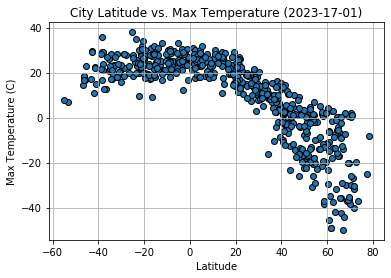

In [139]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

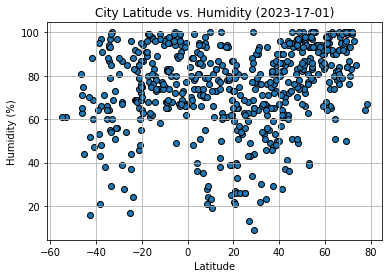

In [140]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

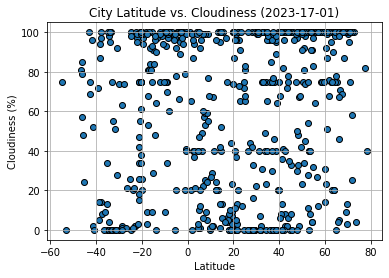

In [141]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

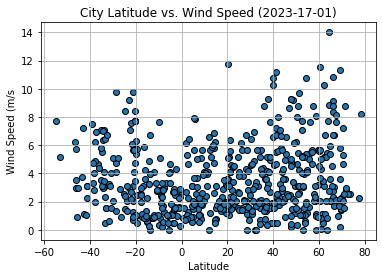

In [142]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [143]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [144]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'],city_data_df['Max Temp'])

# Get regression values
regress_values = city_data_df['Lat'] * slope + intercept
print(regress_values)

City_ID
0       8.738311
1       9.310495
2      19.910661
3      10.936849
4      -3.915231
         ...    
573   -10.948790
574    19.624396
575    20.925151
576     3.704675
577    22.335619
Name: Lat, Length: 578, dtype: float64


In [145]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,26.18,81,20,1.54,US,1673929450
1,bucerias,20.7500,-105.3333,18.99,82,0,1.03,MX,1673929451
3,ratnagiri,16.9833,73.3000,23.16,61,4,1.90,IN,1673929454
4,margate,51.3813,1.3862,-2.05,66,98,2.58,GB,1673929455
6,tuktoyaktuk,69.4541,-133.0374,-20.00,84,100,3.60,CA,1673929458


In [146]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bengkulu,-3.8004,102.2655,28.33,67,66,2.68,ID,1673929452
5,vaini,-21.2000,-175.2000,29.09,79,75,3.09,TO,1673929456
7,bluff,-46.6000,168.3333,14.61,81,81,6.20,NZ,1673929195
8,honiara,-9.4333,159.9500,29.86,68,93,2.81,SB,1673929462
9,ballina,-28.8667,153.5667,28.34,68,2,4.75,AU,1673929464


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.720746325374907


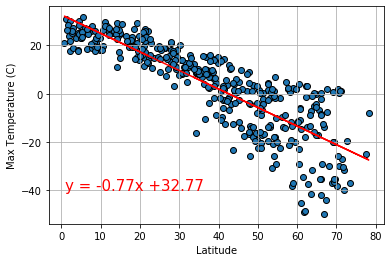

In [147]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq,(1,-40),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.08614027650375516


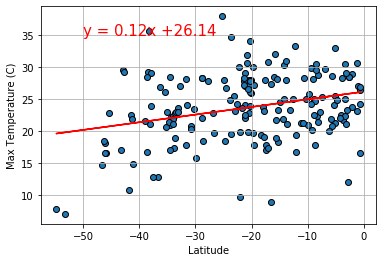

In [148]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13454780034631086


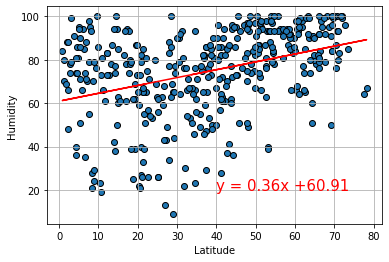

In [149]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.10748825027381605


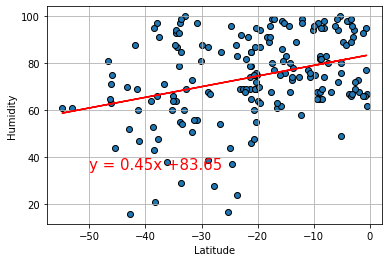

In [150]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09072286507126026


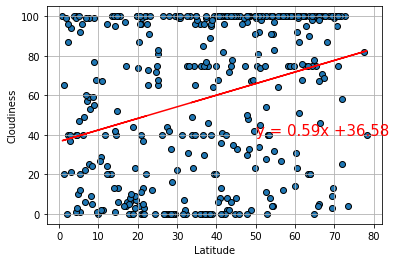

In [151]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq,(50,40),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.1451467298832839


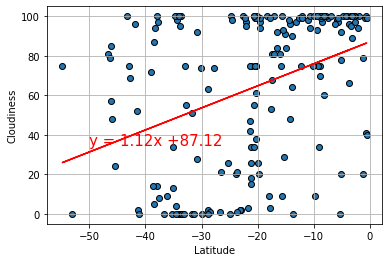

In [152]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03901439467639253


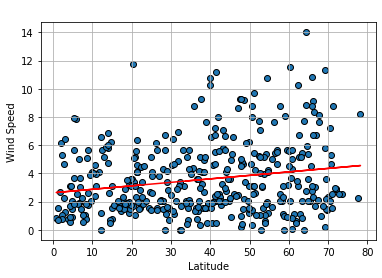

In [153]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.12671005040868666


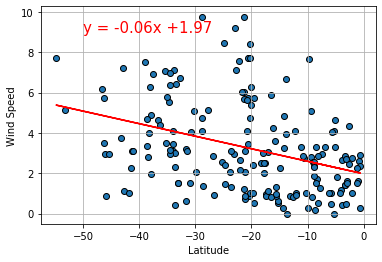

In [154]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE